# HW_6

In [87]:
import pandas as pd
import numpy as np
import zipfile

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [88]:
zip_file = zipfile.ZipFile('data.zip')
files = zip_file.namelist()

In [89]:
files

['data/data_2d.csv', 'data/mnist.csv']

In [95]:
df_2d = pd.read_csv(zip_file.open(files[0]), header=None)
df_mnist = pd.read_csv(zip_file.open(files[1]), header=None)



###  - first DataFrame

In [96]:
df_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


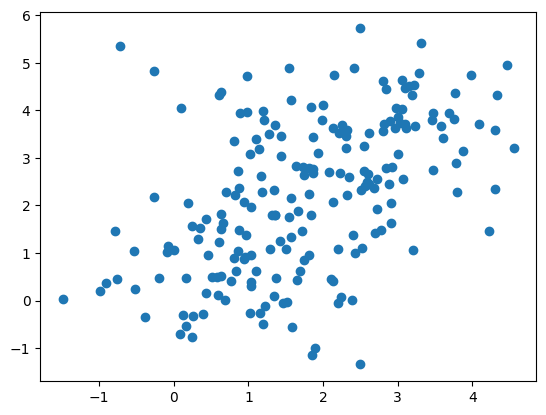

In [91]:
plt.scatter(df_2d[1], df_2d[2])
plt.show()

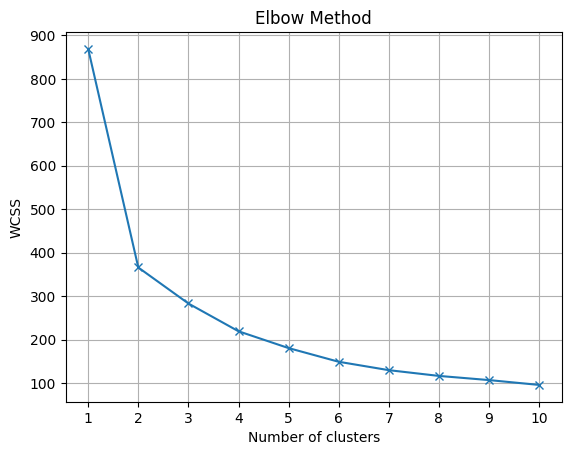

In [92]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='x')
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Оптимальна кількість кластерів = 2

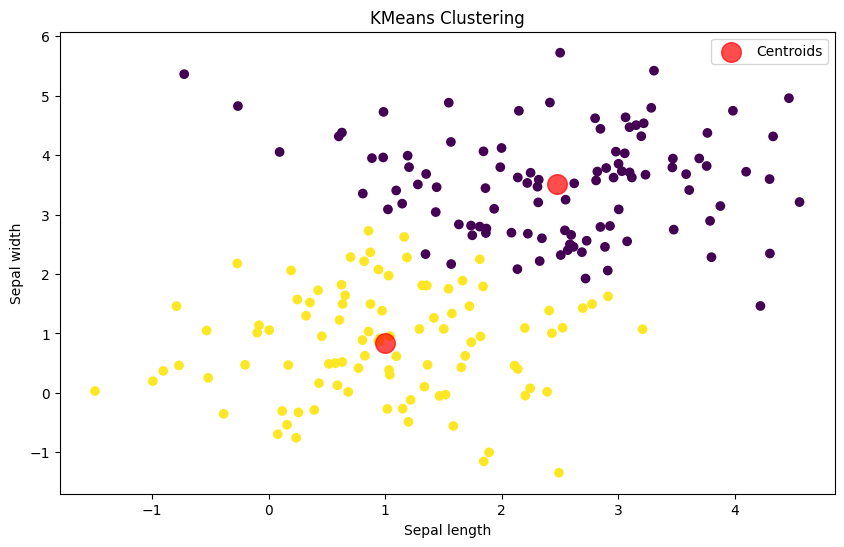

In [94]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_2d)

# create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_2d[:, 1], df_2d[:, 2], c=pred_y, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()


### - second DataFrame

In [ ]:
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


зменшення розмірності даних до 2-вимірного варіанту.

In [ ]:
# assuming df is your DataFrame and the columns are your features
# 1. Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_mnist)

# 2. Apply PCA
pca = PCA(2)
principalComponents = pca.fit_transform(df_scaled)

# 3. Create a DataFrame with the principal components
df_mnist_2d = pd.DataFrame(data = principalComponents,
                           columns = ['PC' + str(x) for x in range(1, len(df_mnist.columns[:2])+1)])
display(df_mnist_2d.head())

,PC1,PC2
0,-4.528447,4.198120
1,5.025887,-12.465208
2,-6.907431,-5.891273
3,8.584199,-0.337781
4,1.105897,6.577209


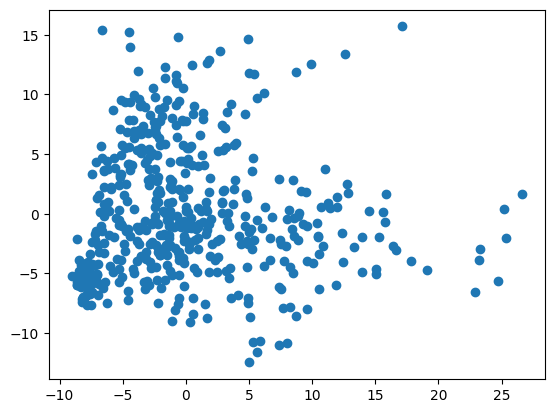

In [ ]:
plt.scatter(df_mnist_2d['PC1'], df_mnist_2d['PC2'])
plt.show()

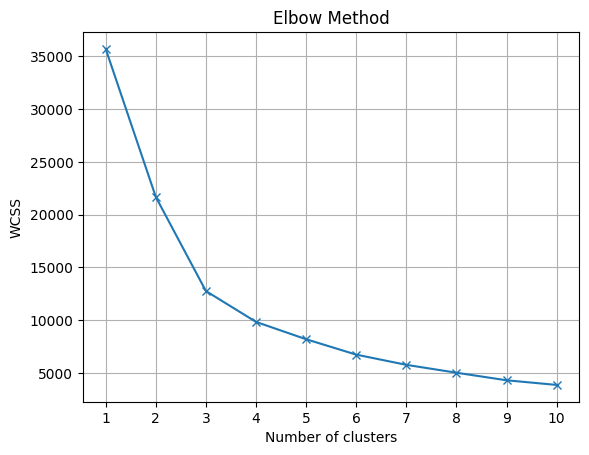

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_mnist_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='x')
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Оптимальна кількість кластерів = 3

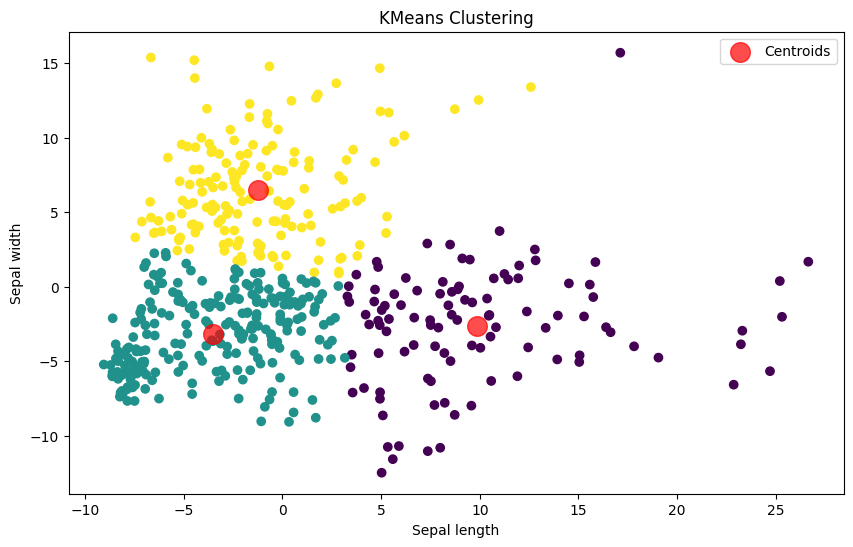

In [97]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_mnist_2d)

# create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_mnist_2d[:, 0], df_mnist_2d[:, 1], c=pred_y, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()